In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import keras.backend as K
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.regularizers import l1_l2
from sklearn.metrics import accuracy_score
from collections import OrderedDict, Counter
from tensorflow.python.ops import gen_array_ops
from keras.layers import Dense, Dropout, Flatten
from names import Names as n

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
matplotlib.use("tkagg")
%matplotlib inline

In [3]:
cfus = pd.read_csv("experiment_data/processed/yeast_ethanol/cfu_data.csv")

In [4]:
cfus = cfus.loc[cfus[n.timepoint]!=0.0]

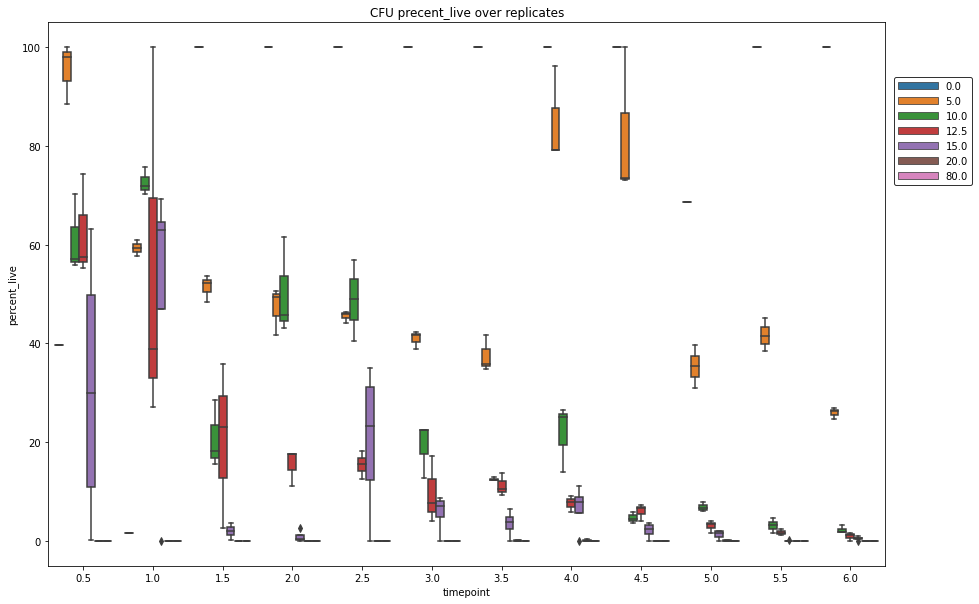

In [5]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=cfus, x=n.timepoint, y=n.percent_live, hue=n.inducer_concentration,
            )


plt.title("CFU precent_live over replicates")
legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
legend.get_frame().set_edgecolor('black')

In [6]:
cfus_2019_only = cfus.loc[cfus["date_of_experiment"].astype(str).str.contains("2019")]
cfus_2020_only = cfus.loc[~cfus["date_of_experiment"].astype(str).str.contains("2019")]

In [7]:
cfus.shape

(216, 15)

In [8]:
cfus_2019_only.shape

(36, 15)

In [9]:
cfus_2020_only.shape

(180, 15)

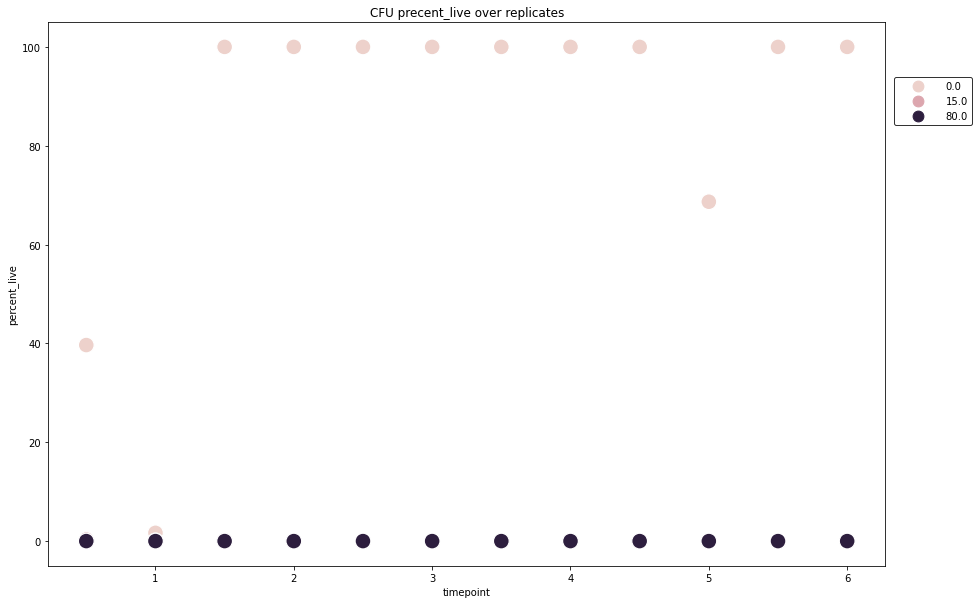

In [10]:
plt.figure(figsize=(15, 10))

sns.scatterplot(data=cfus_2019_only, x=n.timepoint, y=n.percent_live, hue=n.inducer_concentration,
                s=250, legend="full")


plt.title("CFU precent_live over replicates")
legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
legend.get_frame().set_edgecolor('black')

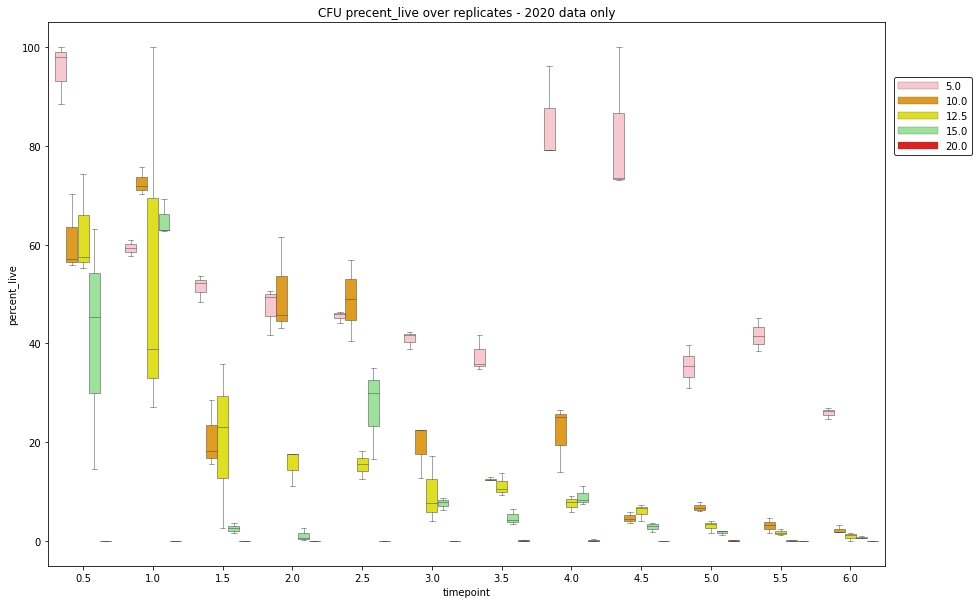

In [11]:
plt.figure(figsize=(15, 10))

palette = {0: "blue", 5: "pink", 10: "orange", 12.5: "yellow", 15: "lightgreen", 20: "red", 80: "purple"}

sns.boxplot(data=cfus_2020_only, x=n.timepoint, y=n.percent_live, hue=n.inducer_concentration,
            linewidth=0.5, palette=palette)


plt.title("CFU precent_live over replicates - 2020 data only")
legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
legend.get_frame().set_edgecolor('black')

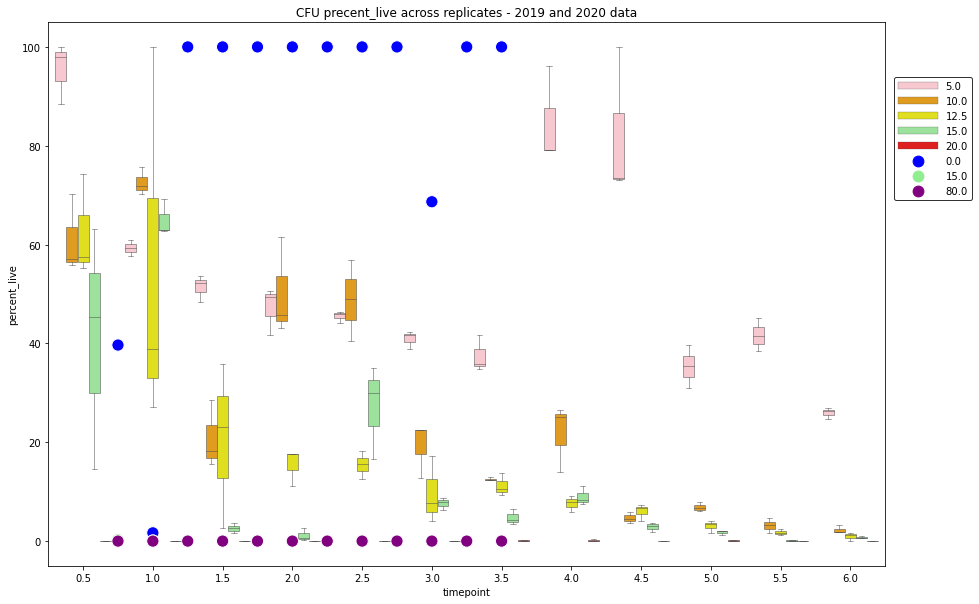

In [12]:
plt.figure(figsize=(15, 10))

sns.scatterplot(data=cfus_2019_only, x=n.timepoint, y=n.percent_live, hue=n.inducer_concentration,
                s=150, palette=palette, legend="full")
sns.boxplot(data=cfus_2020_only, x=n.timepoint, y=n.percent_live, hue=n.inducer_concentration,
            linewidth=0.5, palette=palette)


plt.title("CFU precent_live across replicates - 2019 and 2020 data")
legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
legend.get_frame().set_edgecolor('black')

In [13]:
cfus_2020_only[n.timepoint] = cfus_2020_only[n.timepoint].astype(str)
cfus_2019_only[n.timepoint] = cfus_2019_only[n.timepoint].astype(str)

/Users/he/anaconda3/envs/pysd2cat/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/he/anaconda3/envs/pysd2cat/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


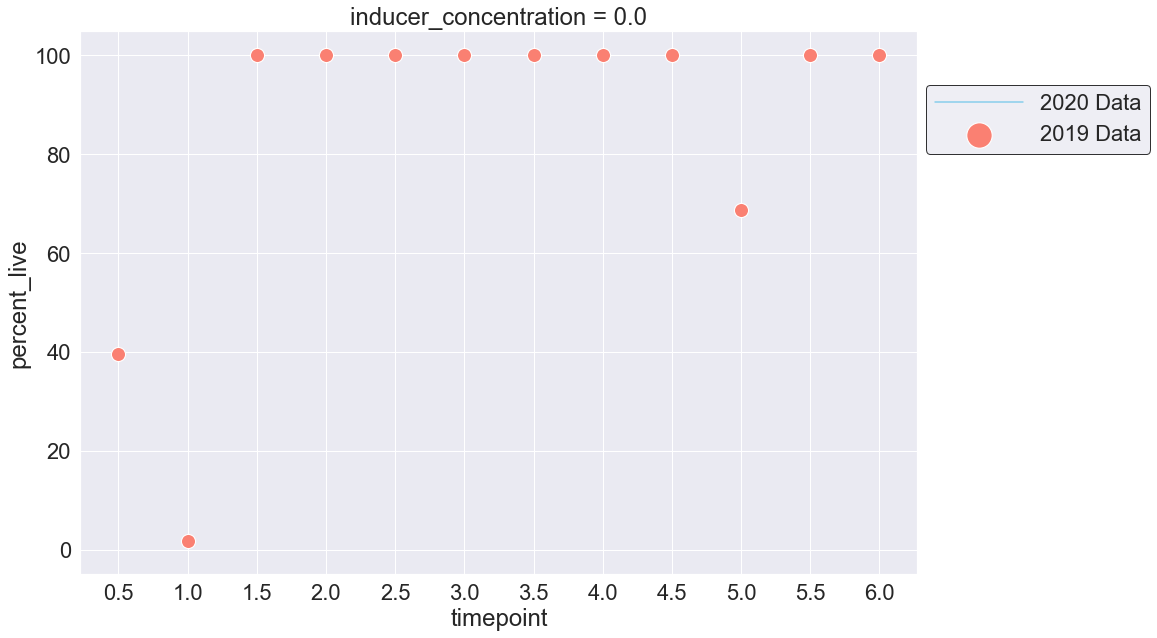

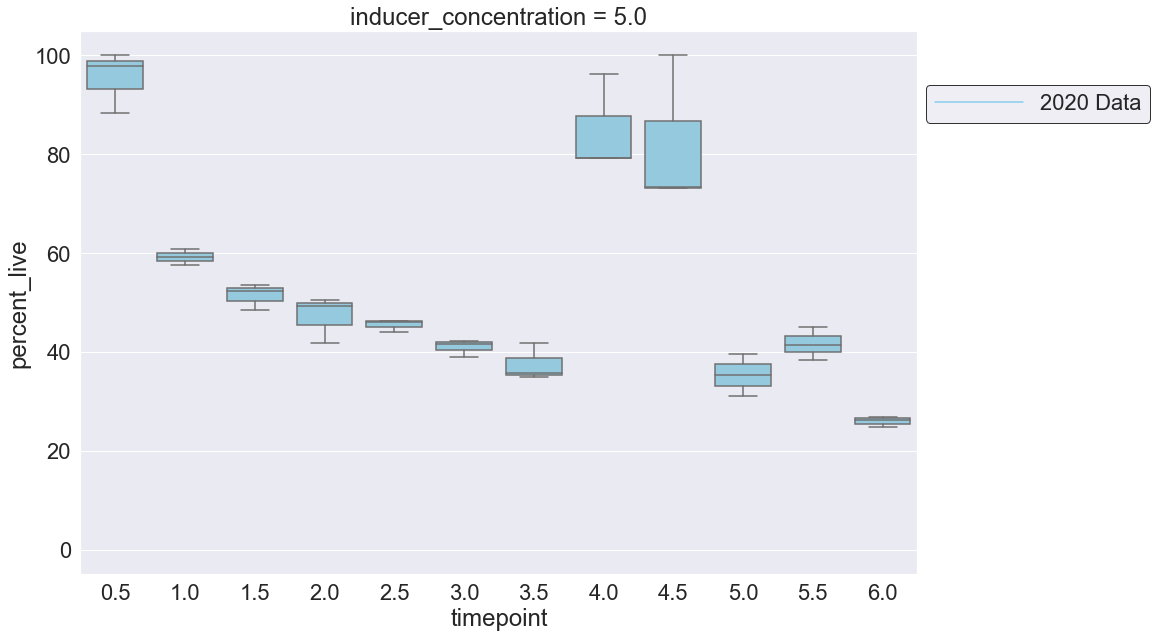

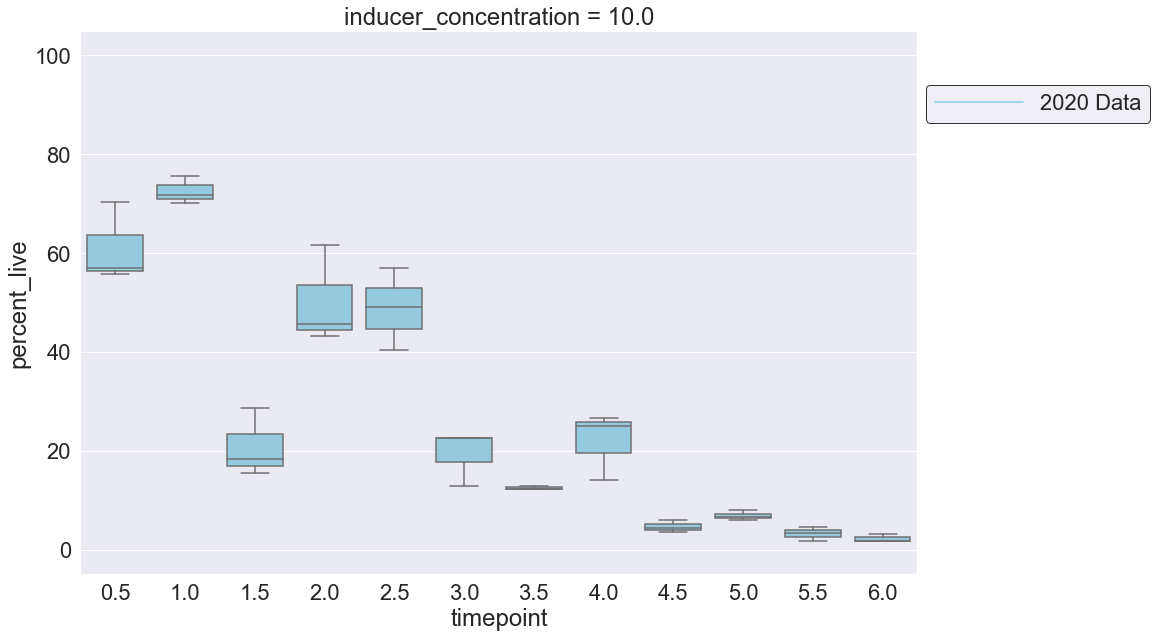

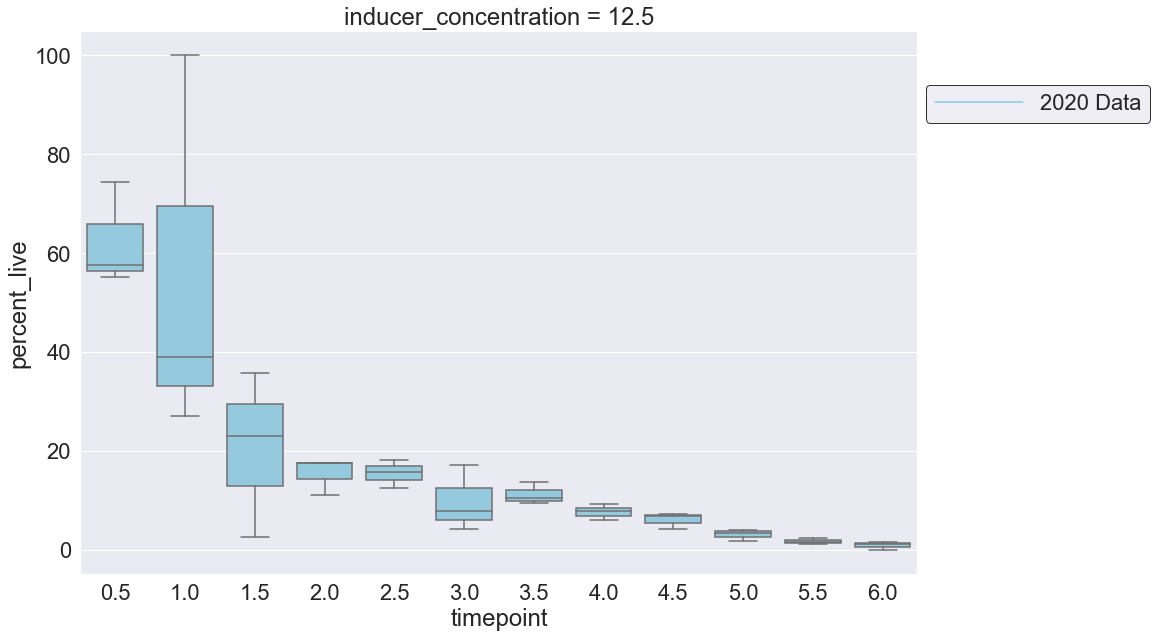

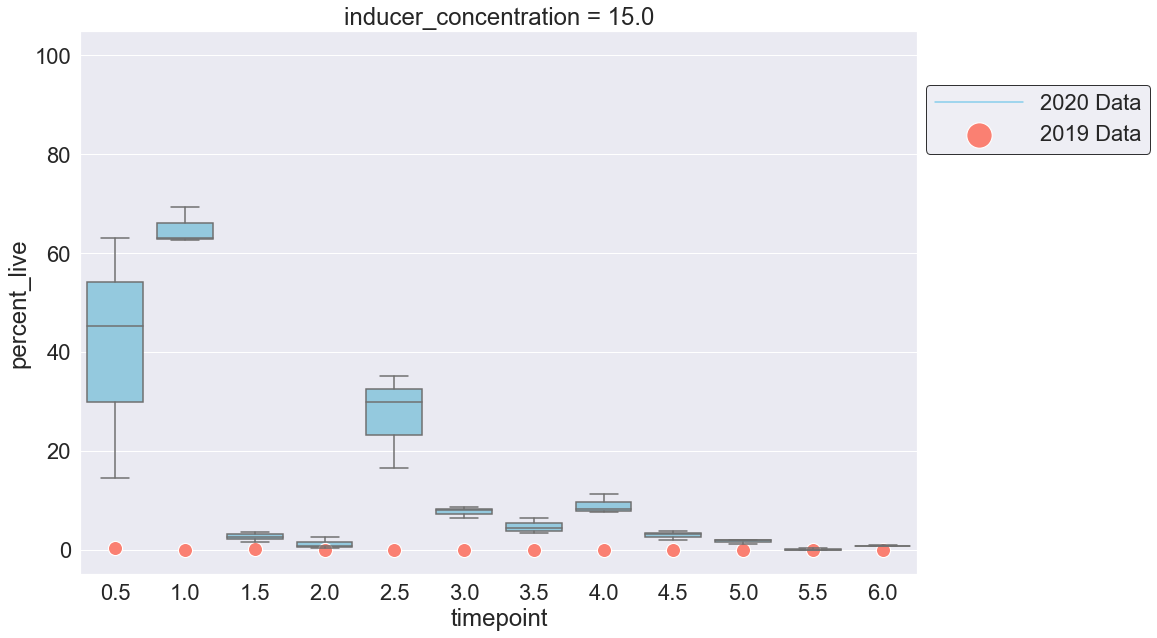

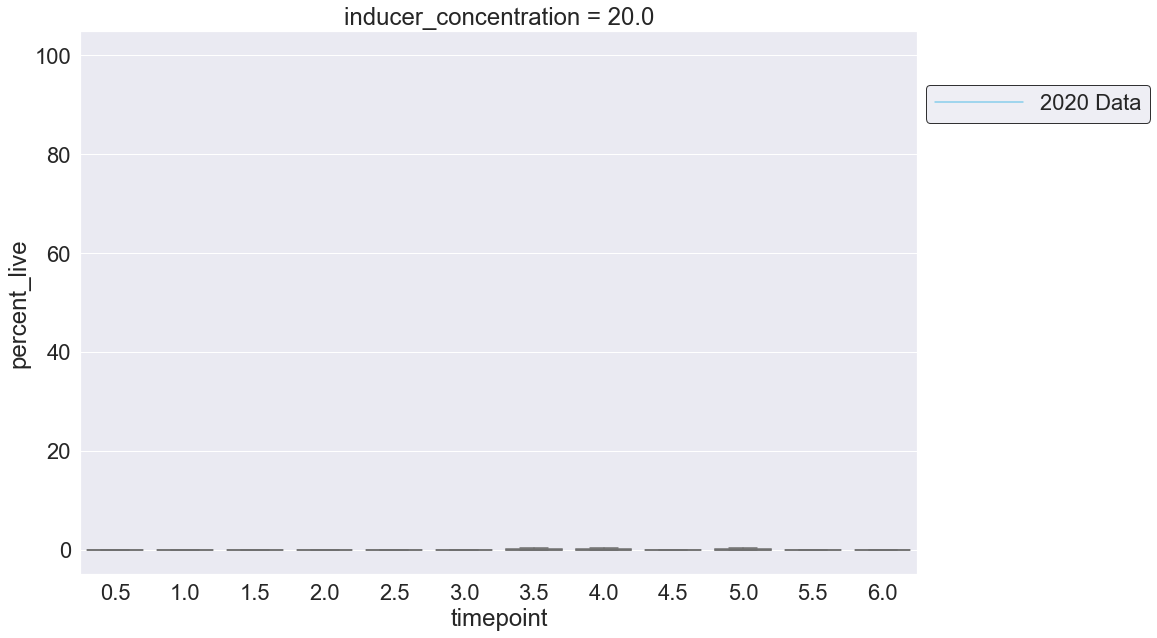

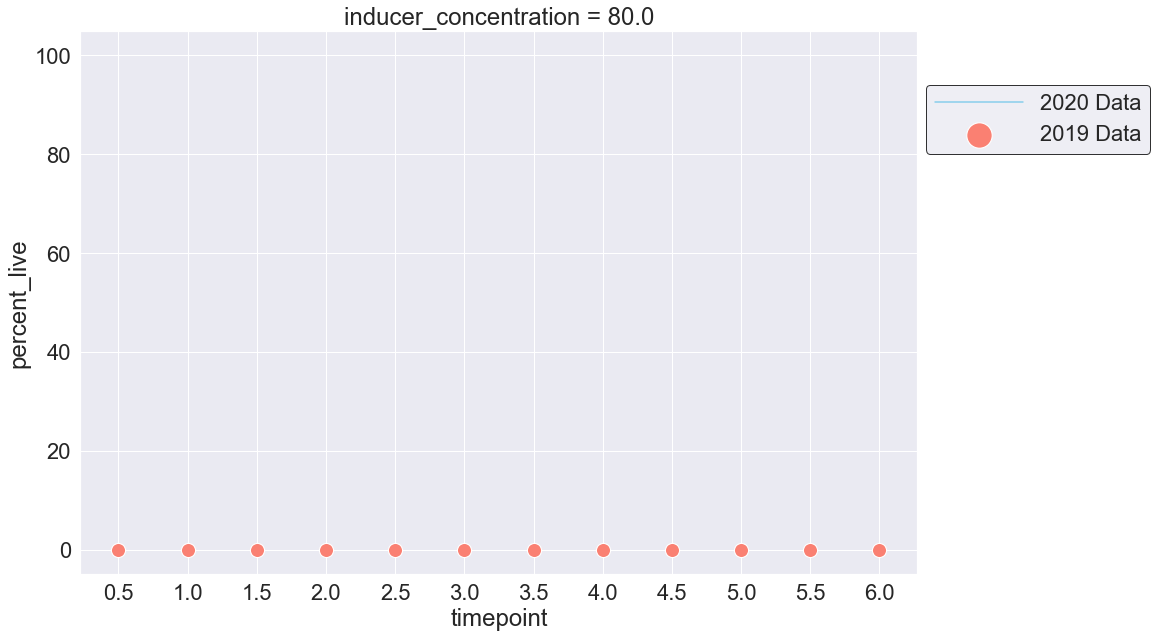

In [14]:
sns.set(font_scale=2)
concs = list(cfus[n.inducer_concentration].unique())
concs.sort()

for x in concs:
    plt.figure(figsize=(15, 10))

    plt.title("{} = {}".format(n.inducer_concentration, x))
    plt.ylim(-5, 105)

    if x in cfus_2019_only[n.inducer_concentration].values:
        plot_me_2019 = cfus_2019_only.loc[cfus_2019_only[n.inducer_concentration] == x]
        sns.scatterplot(data=plot_me_2019, x=n.timepoint, y=n.percent_live, s=200, color="salmon",
                        label="2019 Data")
        
    if x in cfus_2020_only[n.inducer_concentration].values:
        plot_me_2020 = cfus_2020_only.loc[cfus_2020_only[n.inducer_concentration] == x]
        sns.boxplot(data=plot_me_2020, x=n.timepoint, y=n.percent_live, color="skyblue")
    
    plt.plot([], [], label='2020 Data', color='skyblue')
    
    legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
    legend.get_frame().set_edgecolor('black')

In [15]:
cfus.loc[cfus["date_of_experiment"].astype(str).str.contains("2019"), "year"] = "2019"
cfus.loc[~cfus["date_of_experiment"].astype(str).str.contains("2019"), "year"] = "2020"

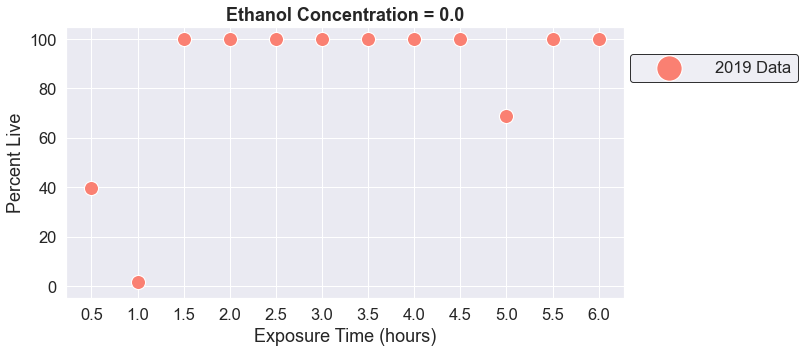

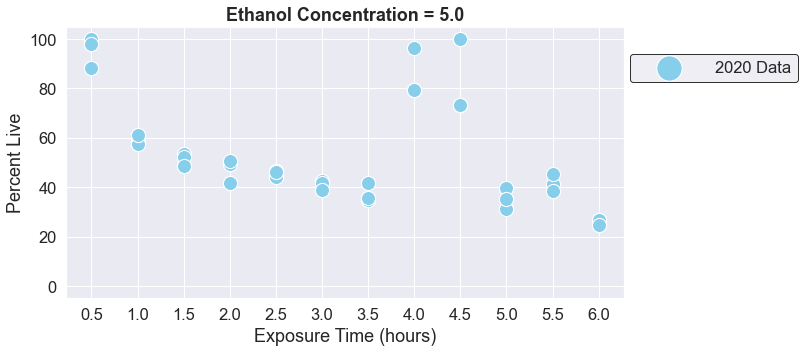

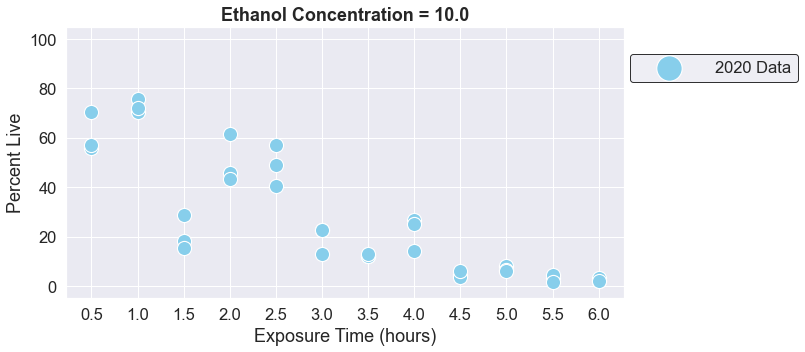

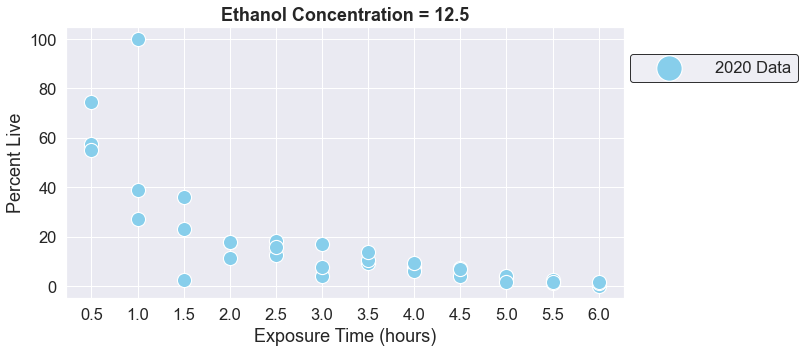

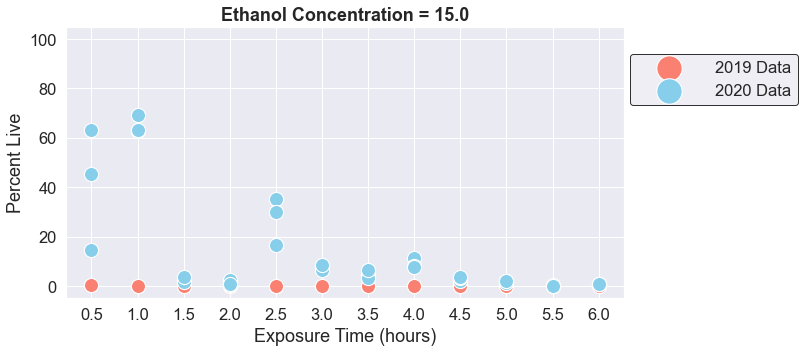

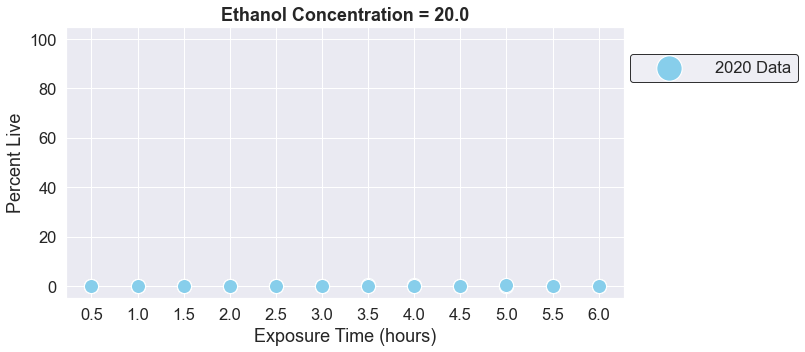

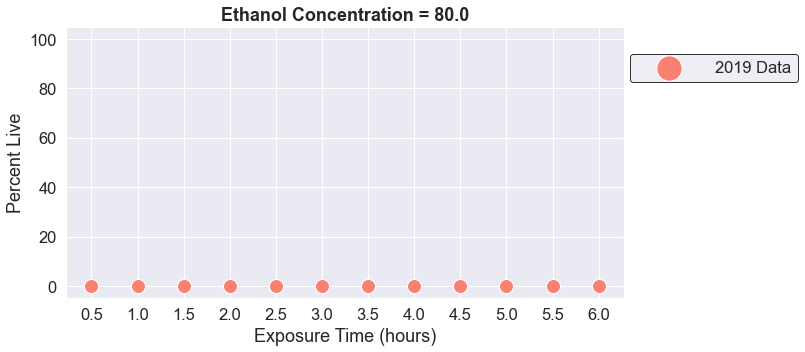

In [16]:
sns.set(font_scale=1.5)
concs = list(cfus[n.inducer_concentration].unique())
concs.sort()

for x in concs:
    plt.figure(figsize=(10, 5))

    plt.title("Ethanol Concentration = {}".format(x), fontweight="bold")
    plt.ylim(-5, 105)

    if x in cfus_2019_only[n.inducer_concentration].values:
        plot_me_2019 = cfus_2019_only.loc[cfus_2019_only[n.inducer_concentration] == x]
        sns.scatterplot(data=plot_me_2019, x=n.timepoint, y=n.percent_live, s=200, color="salmon",
                        label="2019 Data")
        
    if x in cfus_2020_only[n.inducer_concentration].values:
        plot_me_2020 = cfus_2020_only.loc[cfus_2020_only[n.inducer_concentration] == x]
        sns.scatterplot(data=plot_me_2020, x=n.timepoint, y=n.percent_live, s=200, color="skyblue",
                        label="2020 Data")
        
    legend = plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2, borderaxespad=0.,
                    handlelength=4, markerscale=1.8)
    legend.get_frame().set_edgecolor('black')
    plt.xlabel("Exposure Time (hours)")
    plt.ylabel("Percent Live")

## Remove outliers and consolidate 2019 + 2020 data for now

In [39]:
cleaned_cfus = cfus.copy()
cleaned_cfus = cleaned_cfus.loc[~((cleaned_cfus[n.inducer_concentration]==15.0) & (cleaned_cfus["year"] == "2019"))]

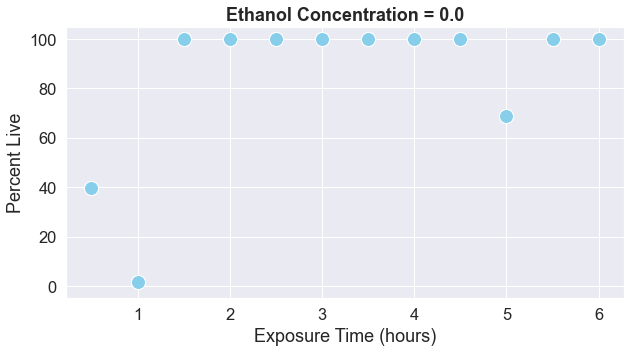

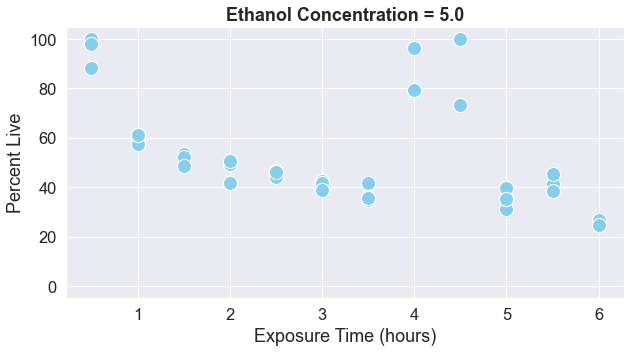

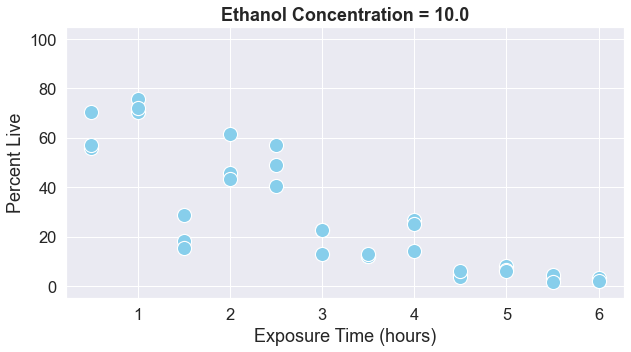

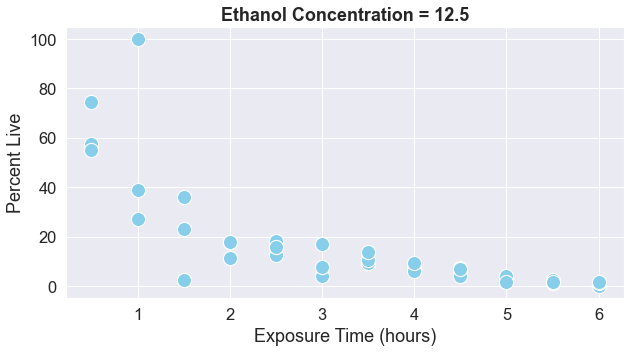

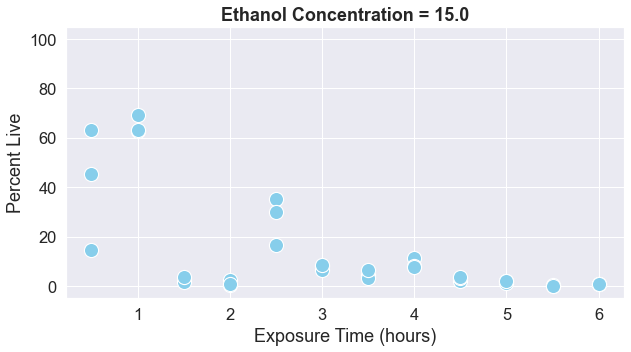

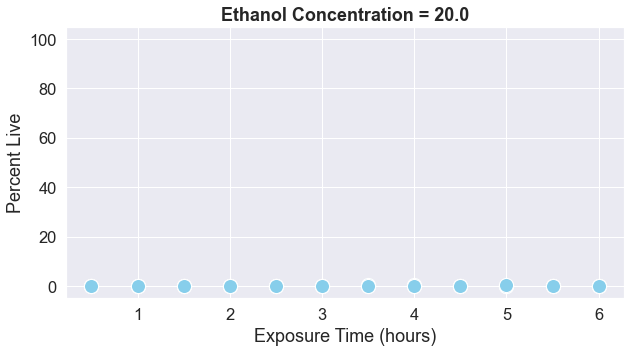

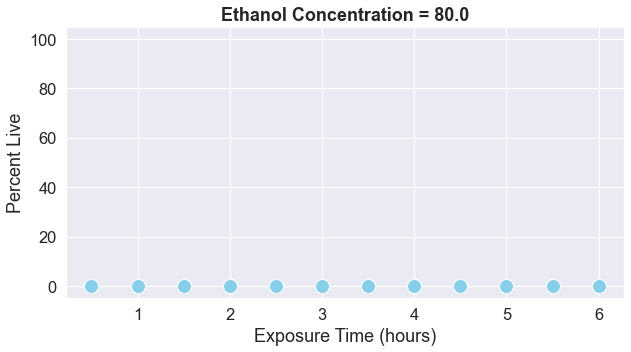

In [41]:
sns.set(font_scale=1.5)
concs = list(cfus[n.inducer_concentration].unique())
concs.sort()

for x in concs:
    plt.figure(figsize=(10, 5))

    plt.title("Ethanol Concentration = {}".format(x), fontweight="bold")
    plt.ylim(-5, 105)
        
    if x in cleaned_cfus[n.inducer_concentration].values:
        plot_me_2020 = cleaned_cfus.loc[cleaned_cfus[n.inducer_concentration] == x]
        sns.scatterplot(data=plot_me_2020, x=n.timepoint, y=n.percent_live, s=200, color="skyblue")

    plt.xlabel("Exposure Time (hours)")
    plt.ylabel("Percent Live")